#### Importing Libraries

In [46]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

In [47]:
image_path_1=r"D:\Journey\CV\Puzzles\Greenery\up.jpg"
image_path_2=r"D:\Journey\CV\Puzzles\Greenery\down.jpg"

#### Check whether file path is correct

In [48]:
if not os.path.exists(image_path_1):
    print("Path is not correct.")

#### Check if Image is empty

In [49]:
image1=cv.imread(image_path_1)
if image1 is None:
    print("The image can't be loaded.")
    exit()

#### Convert Image to HSV Format

In [50]:
hsv=cv.cvtColor(image1,cv.COLOR_BGR2HSV)

#### Lower and Upper Green Colors

In [51]:
lower=np.array([30, 40, 40],dtype=np.uint8)
upper=np.array([90, 255, 255],dtype=np.uint8)

In [52]:
lower_green=np.full((100,100,3),lower,dtype=np.uint8)

In [53]:
lower_green_img=cv.cvtColor(lower_green,cv.COLOR_HSV2BGR)
#cv.imshow("Lower_Green",lower_green_img)
#cv.waitKey(0)

In [54]:
upper_green=np.full((100,100,3),upper,dtype=np.uint8)

In [55]:
upper_green_img=cv.cvtColor(upper_green,cv.COLOR_HSV2BGR)
#cv.imshow("Upper_Green",upper_green_img)
#cv.waitKey(0)

#### Mask

In [56]:
mask=cv.inRange(hsv,lower,upper)

In [57]:
hsv[mask>0,1]=np.clip(hsv[mask>0,1]*1.9,0,255)  #1.9
hsv[mask>0,2]=np.clip(hsv[mask>0,2]*1.3,0,255)  #1.3

In [58]:
enhanced_image=cv.cvtColor(hsv,cv.COLOR_HSV2BGR)

In [59]:
combined_image=np.hstack((image1,enhanced_image))

In [60]:
#cv.imshow("Combined Image",combined_image)
#cv.waitKey(0)

In [61]:
cv.imwrite(f"Enhanced_Greenery_HSV.png",combined_image)

True

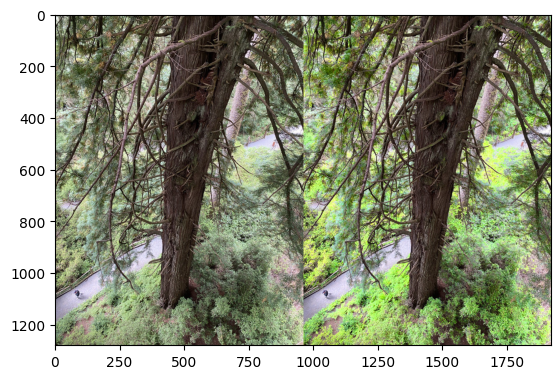

In [62]:
img=plt.imread("D:\Journey\CV\Puzzles\Greenery\Enhanced_Greenery_HSV.png")
plt.imshow(img)